In [1]:
import pandas as pd
import subprocess
import os
import json
from pprint import pprint

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

Get the rank 1 pLDDT from each file

In [4]:
pLDDTs = {}


folders = [f for f in os.listdir() if os.path.isdir(f)]



for f in os.listdir():
    if os.path.isdir(f):
        if 'ipynb' not in str(f):
            os.chdir(f)
            
            for t in os.listdir():
                if 'rank_001' in t and '.json' in t:

                    # Specify the path to your JSON file
                    json_file_path = t

                    # Open and read the JSON file
                    with open(json_file_path, 'r') as json_file:
                        data = json.load(json_file)

                    # Now, 'data' contains the contents of the JSON file as a Python dictionary
                    number = f.split('_')[0]
                    pLDDTs[int(number)] = np.average(data['plddt'])
                            
            os.chdir('..')

pLDDTs = dict(sorted(pLDDTs.items()))
            

Plot pLDDT scores: change the bins to capture your distributions, and change the list ranges and legend to plot each of your parameter groups as a different color

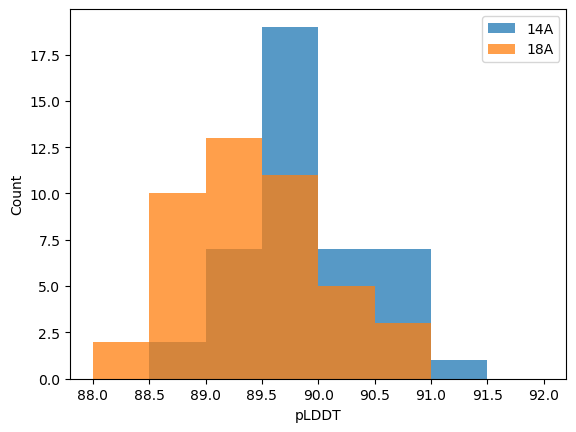

In [5]:
plt.hist(list(pLDDTs.values())[:44], alpha=0.75,bins=[88,88.5,89,89.5,90,90.5,91,91.5,92])
plt.hist(list(pLDDTs.values())[44:], alpha=0.75,bins=[88,88.5,89,89.5,90,90.5,91,91.5,92])
#plt.hist(list(pLDDTs.values())[56:], alpha=0.75,bins=[88,88.5,89,89.5,90,90.5,91,91.5,92])
plt.xlabel('pLDDT')
plt.ylabel('Count')
plt.legend(['14A','18A'])
plt.savefig('pLDDT_plot.png',dpi=300)